<a href="https://colab.research.google.com/github/FelipeToroR/Keras_Desafio1/blob/main/handwritten_letters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
# Leer y guardar el dataset
!git clone https://github.com/OptativoPUCV/Handwritten-letter-dataset
!mkdir Datos-letras
!7z x "/content/Handwritten-letter-dataset/A_Z Handwritten Data.7z.001" -tsplit
!7z e "/content/A_Z Handwritten Data.7z"
data = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')

In [4]:
X = data.drop('0',axis = 1)  # x serán los datos de ENTRADA
y = data['0']    # y representa el label o letra de SALIDA

# **Se divide el dataset en 70% 'train' y 30% 'test'**

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# **Mezclando los datos**


In [6]:
shuffle_data = shuffle(x_train)

#**Normalizando valores de entrada entre 0 e 1.** 
Simplemente se divide en 255 y se obtienen valores que simbolizan 0 para las celdas completamente negras y 1 para las completamente blancas

In [7]:
x_training = x_train.astype('float32')
x_training /= 255

x_testing = x_test.astype('float32')
x_testing /= 255


# **Normalizando valores de salida**
La salida sera un vector con 26 dimensiones, ya que existen 26 clases en el alfabeto inglés (A-Z)

In [8]:
num_classes = 26

y_training = to_categorical(y_train, num_classes)
y_testing = to_categorical(y_test, num_classes)


## **Creación del modelo**
Consiste en 784 neuronas de entradas, 3 capas ocultas (de 208, 104 y 52) y la capa de salida consta de las 26 clases de letras.

In [ ]:
from keras.engine import input_spec
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

modelo = Sequential()
modelo.add(Dense(208, input_shape=(784,), activation="relu"))
modelo.add(Dense(104, activation="relu"))
modelo.add(Dense(52, activation="relu"))
modelo.add(Dense(26, activation="softmax"))


modelo.summary()

In [10]:
modelo.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
history = modelo.fit(x_training, y_training, validation_data=(x_testing, y_testing), batch_size=20, epochs=100, verbose=2)

Epoch 1/100
13036/13036 - 48s - loss: 0.2414 - accuracy: 0.9309 - val_loss: 0.1207 - val_accuracy: 0.9653 - 48s/epoch - 4ms/step
Epoch 2/100
13036/13036 - 42s - loss: 0.1140 - accuracy: 0.9666 - val_loss: 0.1091 - val_accuracy: 0.9687 - 42s/epoch - 3ms/step
Epoch 3/100
13036/13036 - 42s - loss: 0.0896 - accuracy: 0.9736 - val_loss: 0.0980 - val_accuracy: 0.9718 - 42s/epoch - 3ms/step
Epoch 4/100
13036/13036 - 44s - loss: 0.0764 - accuracy: 0.9773 - val_loss: 0.0878 - val_accuracy: 0.9755 - 44s/epoch - 3ms/step
Epoch 5/100
13036/13036 - 43s - loss: 0.0664 - accuracy: 0.9804 - val_loss: 0.0854 - val_accuracy: 0.9775 - 43s/epoch - 3ms/step
Epoch 6/100
13036/13036 - 43s - loss: 0.0603 - accuracy: 0.9823 - val_loss: 0.0866 - val_accuracy: 0.9774 - 43s/epoch - 3ms/step
Epoch 7/100
13036/13036 - 44s - loss: 0.0554 - accuracy: 0.9835 - val_loss: 0.0905 - val_accuracy: 0.9769 - 44s/epoch - 3ms/step
Epoch 8/100
13036/13036 - 43s - loss: 0.0520 - accuracy: 0.9849 - val_loss: 0.0827 - val_accuracy

In [12]:
modelo.save('modelo_entrenado.h5')


In [ ]:
# el modelo generado se guarda y se puede acceder a él de la siguiente manera:
! gdown --id 19E9AZVE851fiDERinkSlH5XvN7tha4ME

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


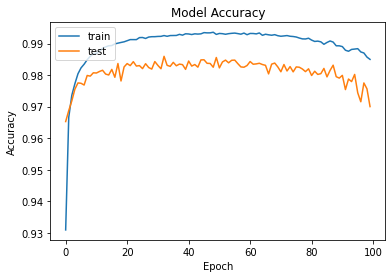

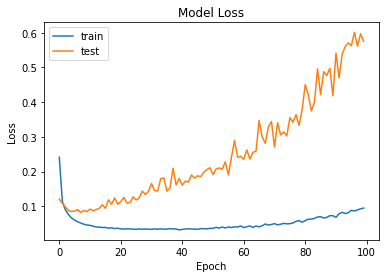

[INFO] test score - 0.5753521919250488
[INFO] test accuracy - 0.9700183272361755


In [13]:
print(history.history.keys())

# evaluar el modelo
scores = modelo.evaluate(x_testing, y_testing, verbose=0)

# Mostrar precision 
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# Mostrar fallos
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# print the results
print("[INFO] test score - {}".format(scores[0]))
print("[INFO] test accuracy - {}".format(scores[1]))

# **Matriz de confusión**

In [15]:
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix, precision_score
Y_pred = modelo.predict(x_testing)
Y_exp = y_testing
for i in range(len(Y_pred)):
  Y_pred[i] = np.array([1 if Y_pred[i][j] == np.max(Y_pred[i]) else 0 for j in range(len(Y_pred[i]))])
  

print(accuracy_score(Y_exp, Y_pred))
print(classification_report(Y_exp, Y_pred))

matriz_confusion = multilabel_confusion_matrix(Y_exp, Y_pred)

0.9700183469816978
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      4157
           1       0.95      0.97      0.96      2525
           2       0.99      0.98      0.99      7010
           3       0.59      0.96      0.73      3064
           4       0.96      0.97      0.97      3466
           5       0.92      0.97      0.94       359
           6       0.98      0.93      0.96      1699
           7       0.98      0.92      0.95      2161
           8       0.95      0.97      0.96       342
           9       0.98      0.95      0.97      2557
          10       0.98      0.95      0.96      1711
          11       0.99      0.99      0.99      3478
          12       0.99      0.97      0.98      3698
          13       0.99      0.97      0.98      5634
          14       0.99      0.99      0.99     17554
          15       0.98      0.98      0.98      5677
          16       0.99      0.93      0.96      1692
        

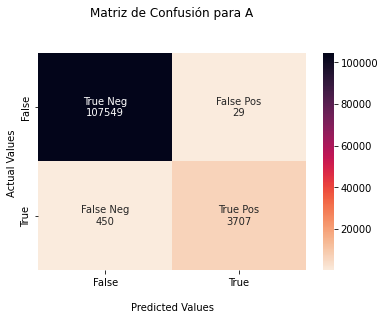

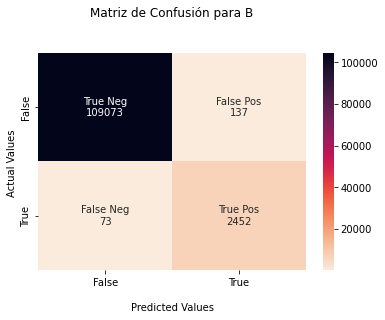

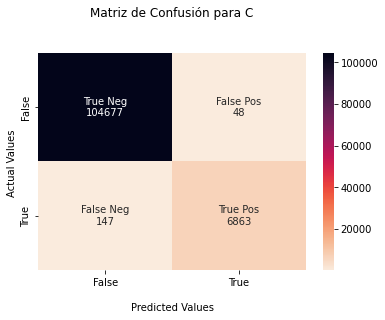

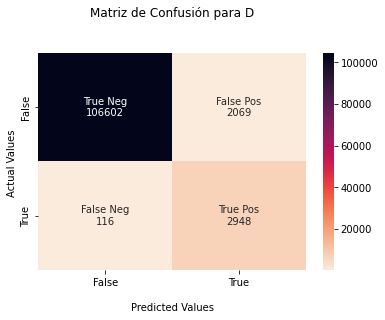

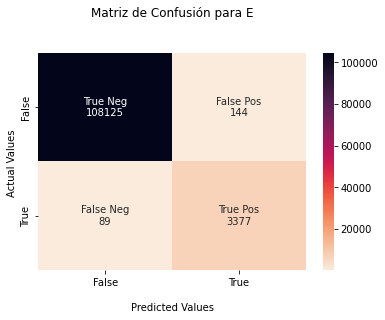

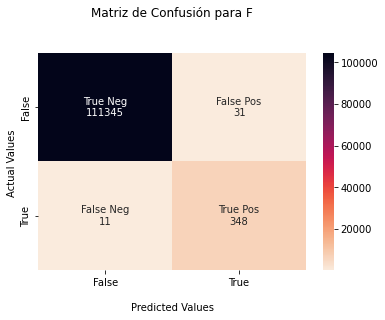

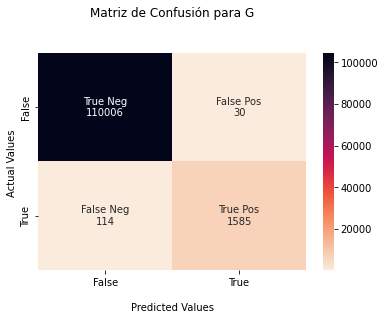

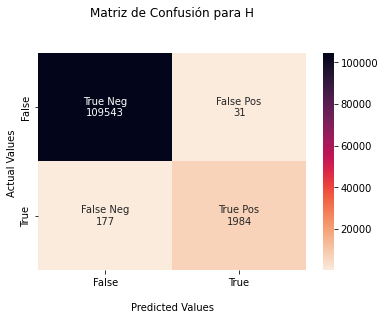

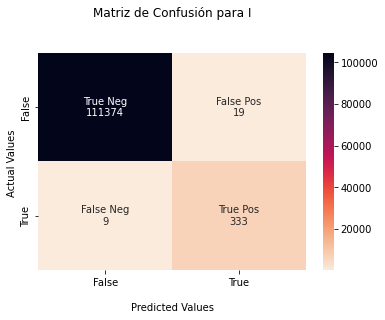

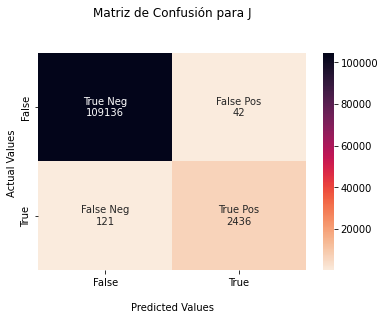

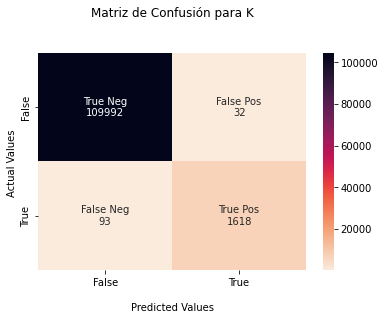

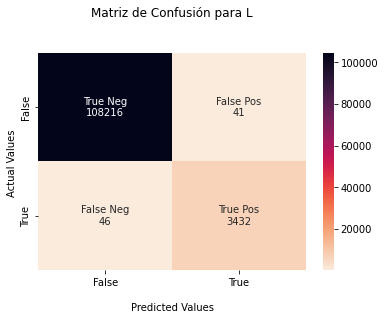

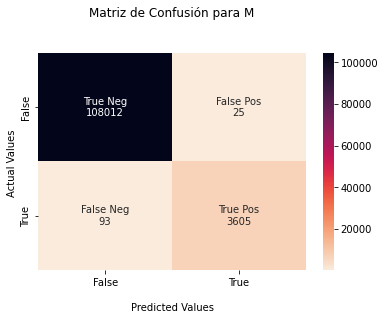

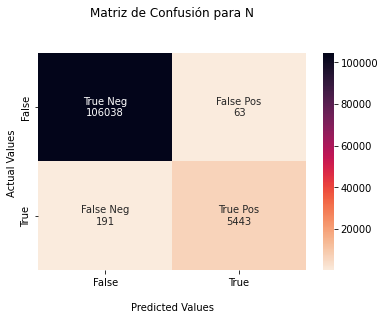

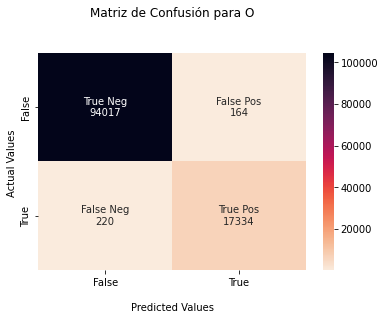

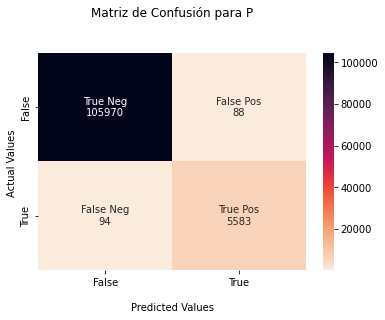

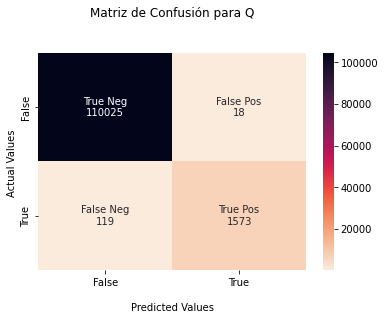

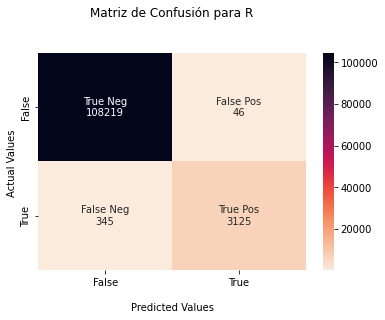

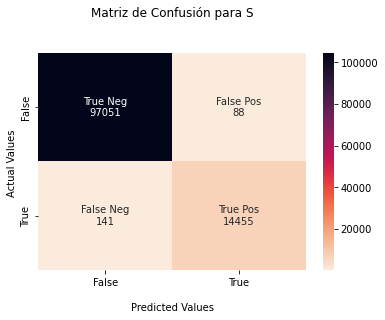

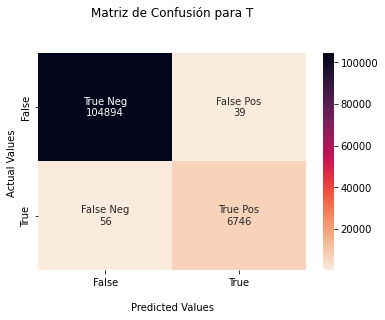

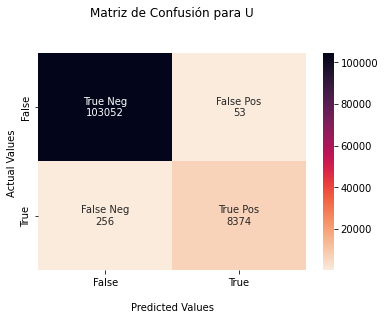

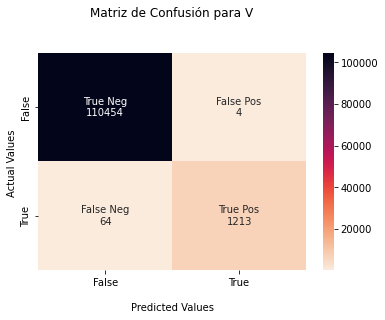

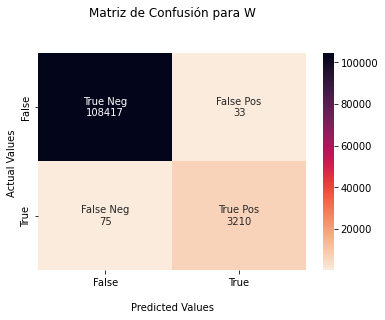

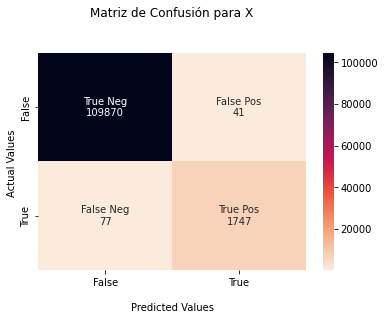

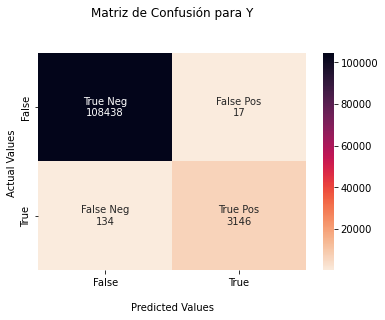

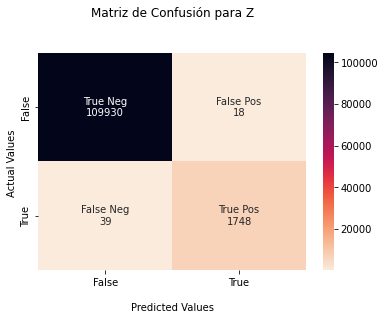

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

clases = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z' ]

for i, matrix in enumerate(matriz_confusion):
  labels = [f'True Neg\n{matrix[0][0]}',f'False Pos\n{matrix[0][1]}',f'False Neg\n{matrix[1][0]}',f'True Pos\n{matrix[1][1]}']

  labels = np.asarray(labels).reshape(2,2)

  ax = sns.heatmap(matriz_confusion[2], annot=labels, fmt='', cmap='rocket_r')

  ax.set_title(f'Matriz de Confusión para {clases[i]}\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()